In [ ]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow

In [ ]:
file_name = '/drive/MyDrive/Roopsa Sen/Raw Data/TOFD3.xlsx'
sheet = 'TOFD3'
df = pd.read_excel(io=file_name, sheet_name=sheet)
df = df[df.iloc[:,1] != '---']
df = df.astype(float)
#print(df.head(5)) 
im_arr = df.to_numpy()

In [ ]:
im_arr = df.to_numpy()

In [ ]:
im_arr = cv2.normalize(im_arr, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
im_arr = im_arr.astype(np.uint8)
#cv2_imshow(im_arr)
#para = im_arr

#[500:800, 500:800]
#[800:1100, 1000:1300]
#[800:1100, 500:800]
#[1100:1400, 500:800]

In [ ]:
cv2_imshow(im_arr)

In [ ]:
img = cv2.Canny(im_arr, 300, 500)

In [ ]:
cv2_imshow(img)

In [ ]:
thresh1 = cv2.adaptiveThreshold(im_arr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 201, 120)
img_crop = cv2.cvtColor(im_arr,cv2.COLOR_GRAY2RGB)
line = pd.DataFrame(columns = ['x', 'grp'])
x = []
lines = cv2.HoughLines(thresh1,1,np.pi/180,800)
for i in range(lines.shape[0]):
  for rho,theta in lines[i]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho

      x1 = x0 + 1000*(-b)
      y1 = y0 + 1000*(a)
      x2 = x0 - 1000*(-b)
      y2 = y0 - 1000*(a)
      cv2.line( img_crop, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 3)

      x.append(x0)
      cv2.circle(img,(x0, y0),3, (0,0,255), -1)

cv2_imshow(img_crop)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dist = 900
line['x'] = x
line = line.sort_values('x').reset_index(drop = True)
for i in range(line.shape[0]):
  if line['x'][i] - line['x'][0] > dist:
    line['grp'][i] = 1
  else:
    line['grp'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
offset = 180
line1_start = line.groupby('grp').get_group(0).iloc[1]['x']
line1_end = line.groupby('grp').get_group(0).iloc[-2]['x'] + offset
line2_start = line.groupby('grp').get_group(1).iloc[1]['x'] - offset

In [ ]:
range_a = list(np.arange(0.1 ,15, 0.2))
def hough(im):
  def x1_(x, y, y1, a):
    return int(round(x - a*(y - y1)**2))

  len_a = len(range_a)
  acc_arr = np.zeros(shape = (im.shape[0], im.shape[1], len_a))
  for y in range(im.shape[0]):
    for x in range(im.shape[1]):
      if im[y,x] == 255:
        for a in range(len_a):
          for y1 in range(max(0, y - 100), min(y + 100, im.shape[0])):
            x1 = x1_(x, y1, y, range_a[a])
            if x1>0 and x1<im.shape[1]:
              acc_arr[y1, x1, a] = acc_arr[y1, x1, a] + 1

  return acc_arr


In [ ]:
def draw_para(x1, y1, a, img, color):
  for y in range(y1 - 20, y1 + 20):
    x = int(x1 + a*(y - y1)**2)
    if x > x1 - 20 and x < x1 + 20:
      cv2.circle(img, (x,y), radius = 1, color = color, thickness = -1)


In [ ]:
im_arr.shape

(2549, 1952)

In [ ]:
np.unique(acc_arr)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34.])

In [ ]:
im_height = 300
im_width = 250
im_offset = 50
x_coords1 = np.arange(0, line1_start - im_width, im_width - im_offset)
x_coords2 = np.arange(line1_end, line2_start - im_width, im_width - im_offset)
w_start = np.concatenate((x_coords1, [line1_start - im_width], x_coords2, [line2_start - im_width]), axis = 0)

h_start = np.arange(0,im_arr.shape[0], im_height - im_offset)

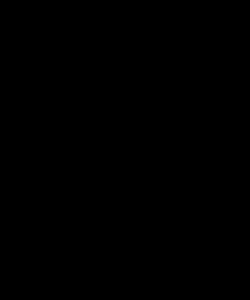

0.0 0


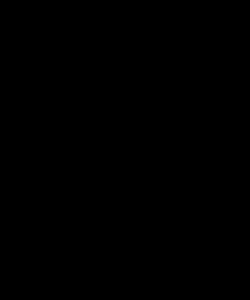

0.0 250


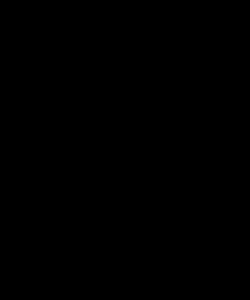

0.0 500


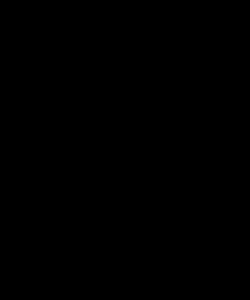

0.0 750


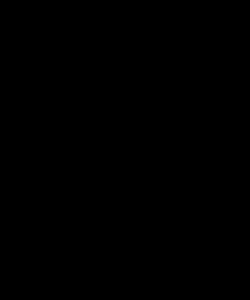

0.0 1000


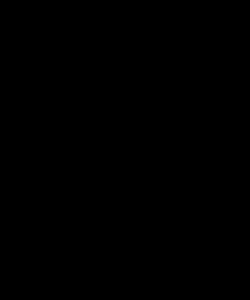

0.0 1250


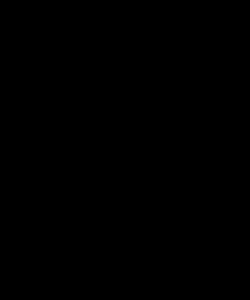

0.0 1500


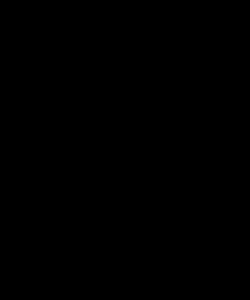

0.0 1750


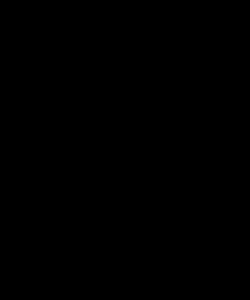

0.0 2000


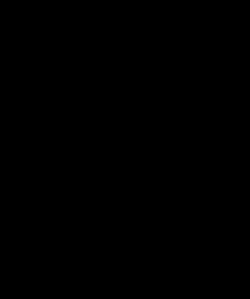

0.0 2250


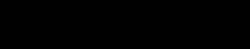

0.0 2500


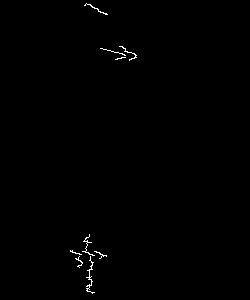

200.0 0


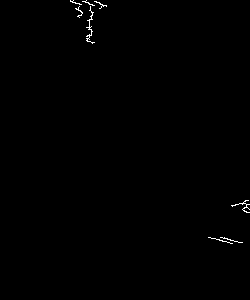

200.0 250


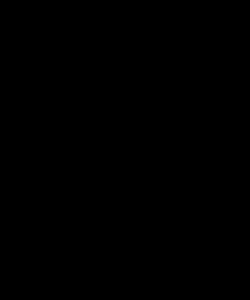

200.0 500


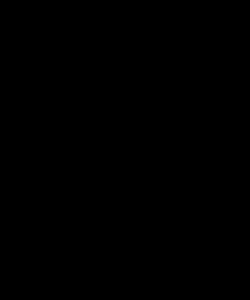

200.0 750


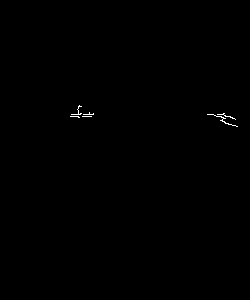

200.0 1000


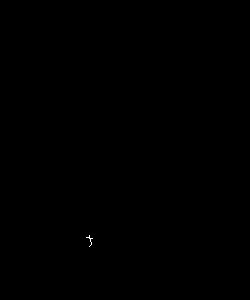

200.0 1250


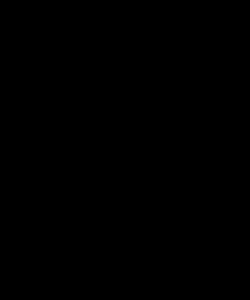

200.0 1500


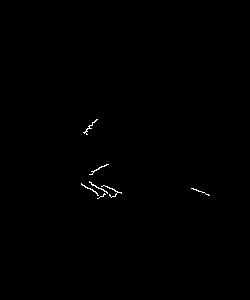

200.0 1750


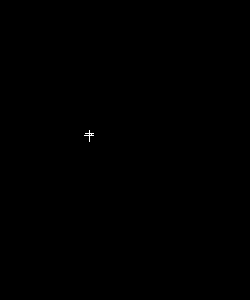

200.0 2000


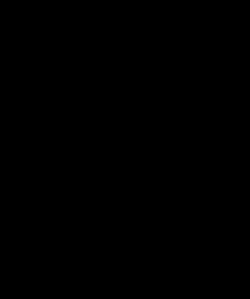

200.0 2250


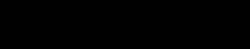

200.0 2500


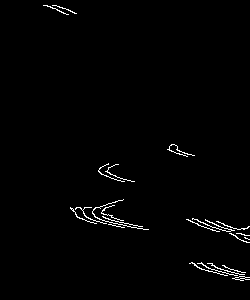

400.0 0


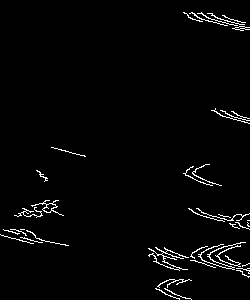

400.0 250


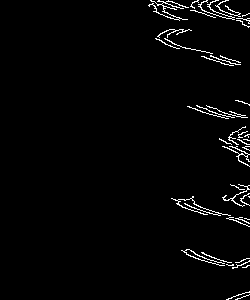

400.0 500


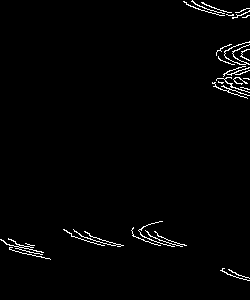

400.0 750


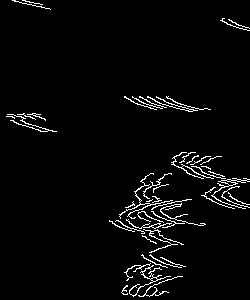

400.0 1000


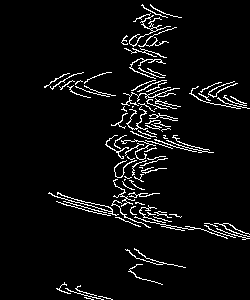

400.0 1250


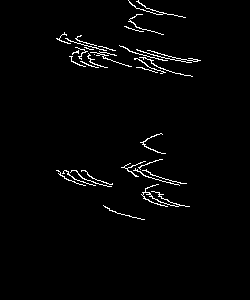

400.0 1500


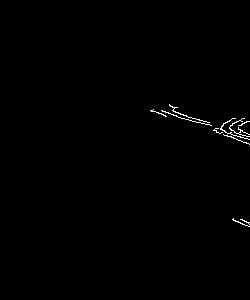

400.0 1750


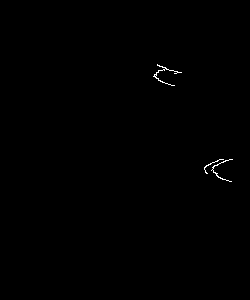

400.0 2000


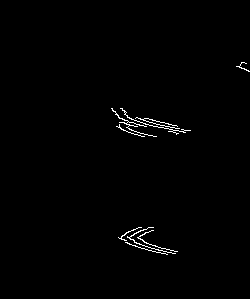

400.0 2250


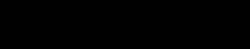

400.0 2500


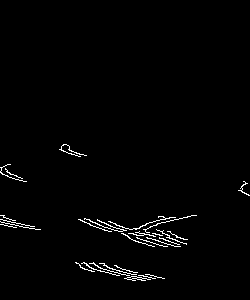

508.95843505859375 0


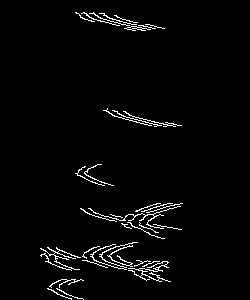

508.95843505859375 250


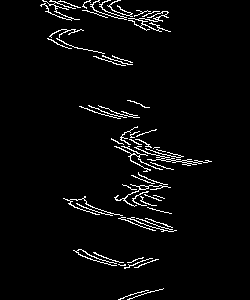

508.95843505859375 500


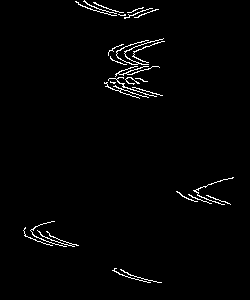

508.95843505859375 750


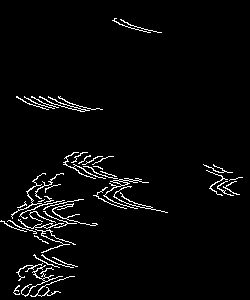

508.95843505859375 1000


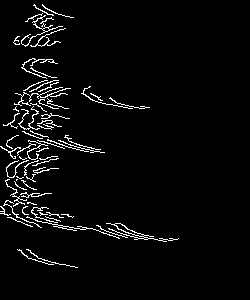

508.95843505859375 1250


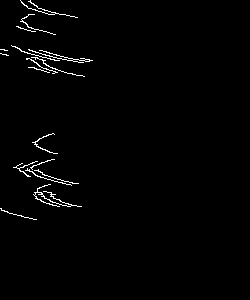

508.95843505859375 1500


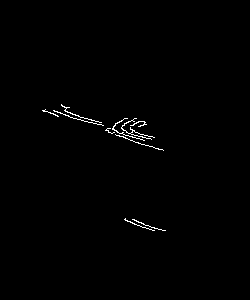

508.95843505859375 1750


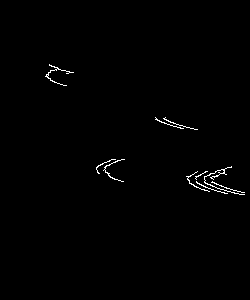

508.95843505859375 2000


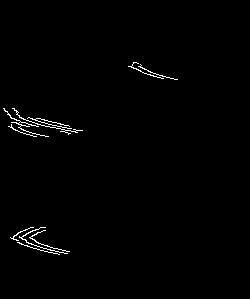

508.95843505859375 2250


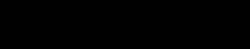

508.95843505859375 2500


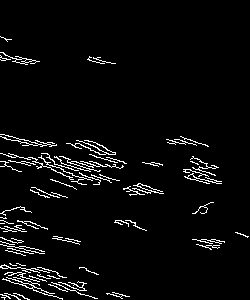

1064.7857666015625 0


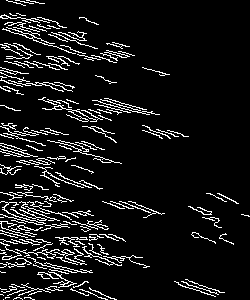

1064.7857666015625 250


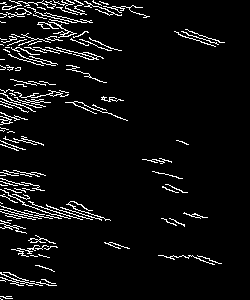

1064.7857666015625 500


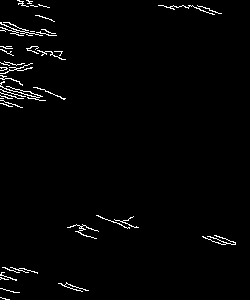

1064.7857666015625 750


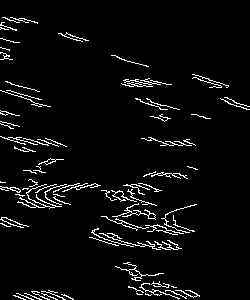

1064.7857666015625 1000


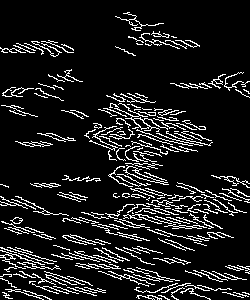

1064.7857666015625 1250


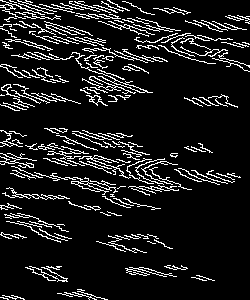

1064.7857666015625 1500


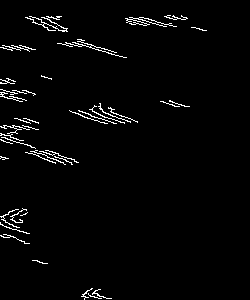

1064.7857666015625 1750


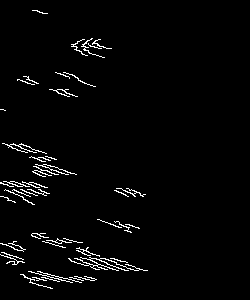

1064.7857666015625 2000


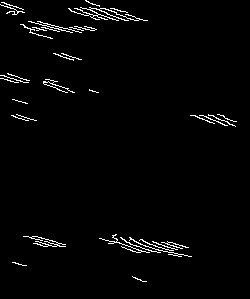

1064.7857666015625 2250


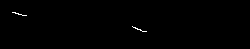

1064.7857666015625 2500


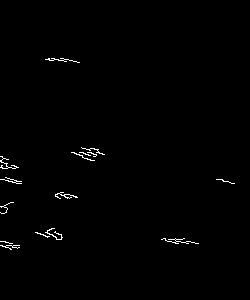

1264.7857666015625 0


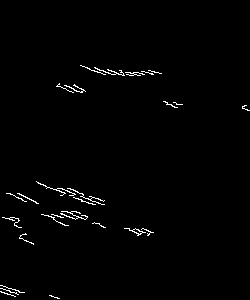

1264.7857666015625 250


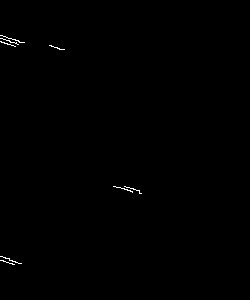

1264.7857666015625 500


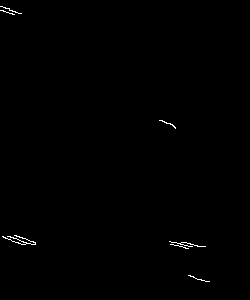

1264.7857666015625 750


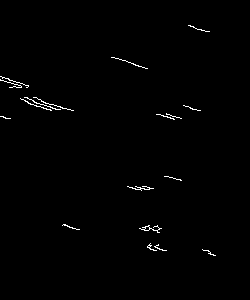

1264.7857666015625 1000


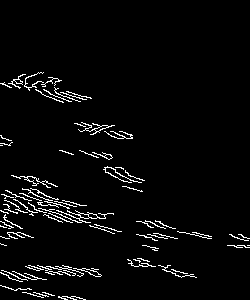

1264.7857666015625 1250


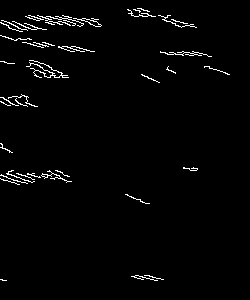

1264.7857666015625 1500


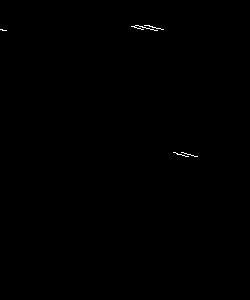

1264.7857666015625 1750


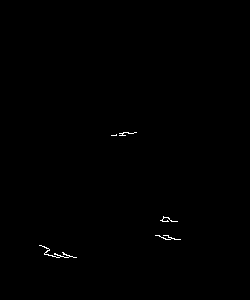

1264.7857666015625 2000


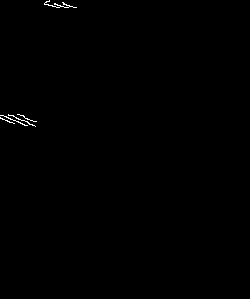

1264.7857666015625 2250


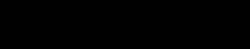

1264.7857666015625 2500


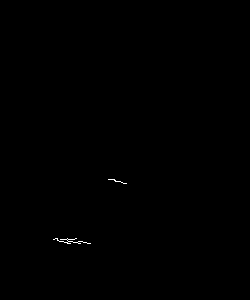

1372.7254638671875 0


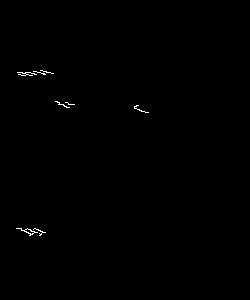

1372.7254638671875 250


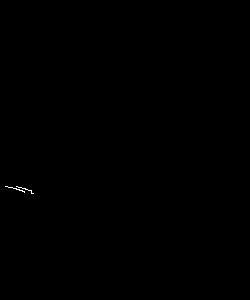

1372.7254638671875 500


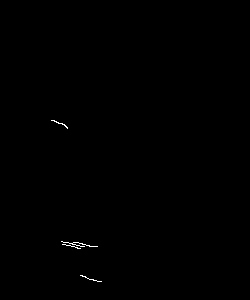

1372.7254638671875 750


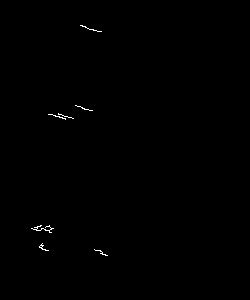

1372.7254638671875 1000


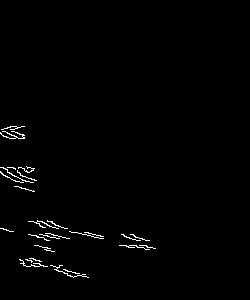

1372.7254638671875 1250


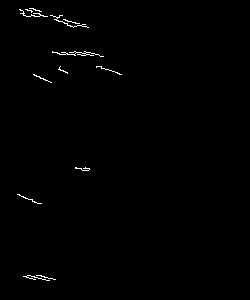

1372.7254638671875 1500


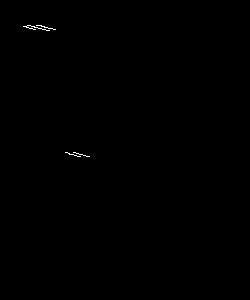

1372.7254638671875 1750


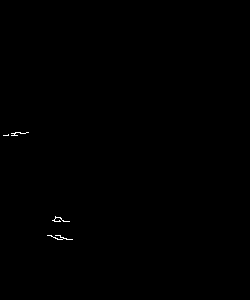

1372.7254638671875 2000


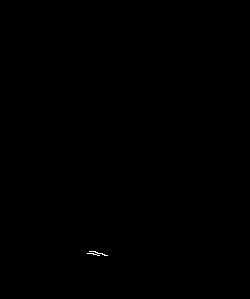

1372.7254638671875 2250


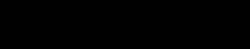

1372.7254638671875 2500


In [ ]:
#img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
thresh = 15
reqd = []
for coord_x in w_start:
  for coord_y in h_start:
    reqd_temp = []
    para = im_arr[int(coord_y):int(coord_y) + int(im_height), int(coord_x):int(coord_x) + int(im_width)]
    CannyAccThresh = cv2.threshold(para,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    CannyThresh = CannyAccThresh[0]
    para = cv2.Canny(para,CannyThresh,3*CannyThresh)
    cv2_imshow(para)

    acc_arr = hough(para)
    print(coord_x, coord_y)
    for h, w, a in np.argwhere(acc_arr > thresh):
      reqd.append([h+coord_y, w +coord_x, a])


In [ ]:
len(reqd)

30185

In [ ]:
np.unique(acc_arr)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [ ]:
reqd_df = pd.DataFrame(reqd, columns = ['h', 'w', 'a'])
reqd_df = reqd_df.sort_values(['h'])
reqd_df = reqd_df.reset_index(drop = True)
reqd_df['grp_h'] = np.nan
grp = 0
for i in range(len(reqd_df) - 1):
  reqd_df['grp_h'][i] = grp
  if abs(reqd_df['h'][i + 1] - reqd_df['h'][i]) > 20:
    grp = grp + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
grp = 0
reqd_df = reqd_df.sort_values(['grp_h', 'w'])
reqd_df = reqd_df.reset_index(drop = True)
reqd_df['grp'] = np.nan

for i in range(len(reqd_df) - 1):
  reqd_df['grp'][i] = grp
  if reqd_df['grp_h'][i + 1] != reqd_df['grp_h'][i] or abs(reqd_df['w'][i + 1] - reqd_df['w'][i]) > 20:
    grp = grp + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
sel_grps = []
for i in range(int(reqd_df['grp_h'].max() + 1)):
  #if len(reqd_df.groupby('grp').get_group(i)) > 1 and len(reqd_df.groupby('grp').get_group(i)) < 10:
  sel_grps.append(i)
    

In [ ]:
np.unique(reqd_df['grp'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., nan])

In [ ]:

col = [[200,0,0], [0, 200, 0], [0, 0, 200], [0, 100, 100], [100, 0, 100], [100, 100, 0]]
im_col = cv2.cvtColor(im_arr,cv2.COLOR_GRAY2RGB)
for h, w, a, grp_h, grp in np.array(reqd_df):
    if not(math.isnan(grp)):
      draw_para(int(w),int(h),range_a[int(a)], im_col, col[int(int(grp_h)%len(col))])

cv2_imshow(im_col)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
bbox = pd.DataFrame(columns = ['h_min', 'h_max', 'w_min', 'w_max'])
groups = reqd_df.groupby(by = 'grp', axis = 0)
for i in range(len(groups.size())):
  if groups.size()[i] > 1:
    bbox['h_min'] = reqd_df.groupby(by = 'grp', axis = 0).min()['h']
    bbox['h_max'] = reqd_df.groupby(by = 'grp', axis = 0).max()['h']
    bbox['w_min'] = reqd_df.groupby(by = 'grp', axis = 0).min()['w']
    bbox['w_max'] = reqd_df.groupby(by = 'grp', axis = 0).max()['w']

In [ ]:
groups = reqd_df.groupby(by = 'grp', axis = 0)
groups.size()[0]

23

In [ ]:
im_col = cv2.cvtColor(im_arr,cv2.COLOR_GRAY2RGB)
for h_min, h_max, w_min, w_max in np.array(bbox):
  cv2.rectangle(im_col, (int(w_min) - 50 , int(h_min) - 50), (int(w_max) + 50 , int(h_max) + 50), [200, 0, 0], 4)

cv2_imshow(im_col)

Output hidden; open in https://colab.research.google.com to view.

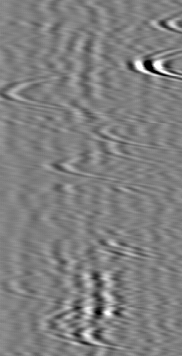

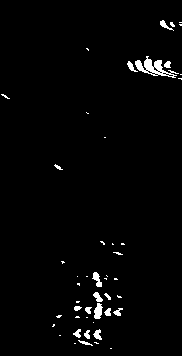

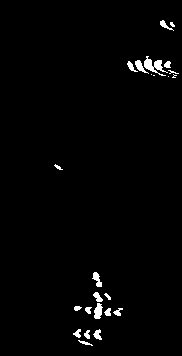

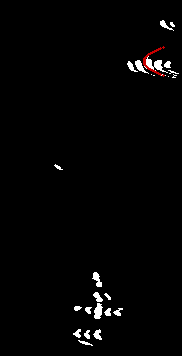

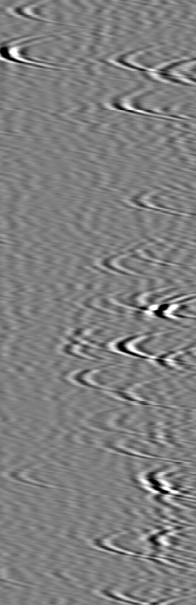

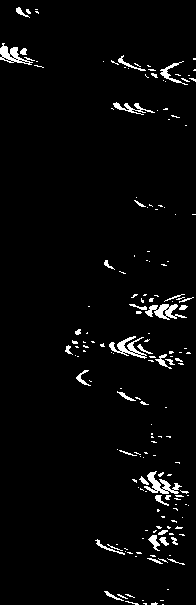

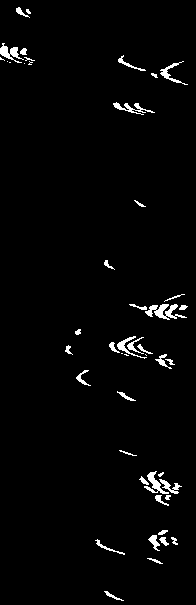

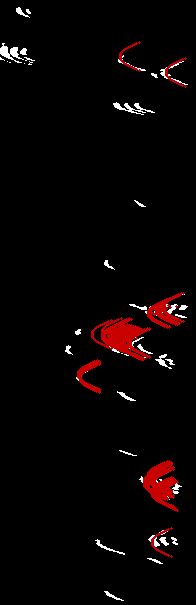

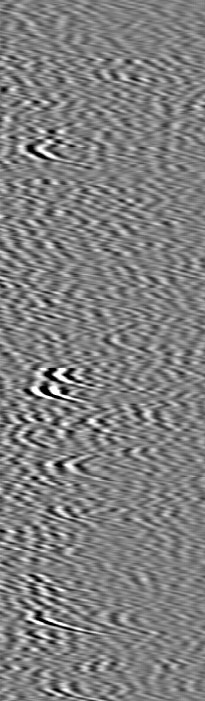

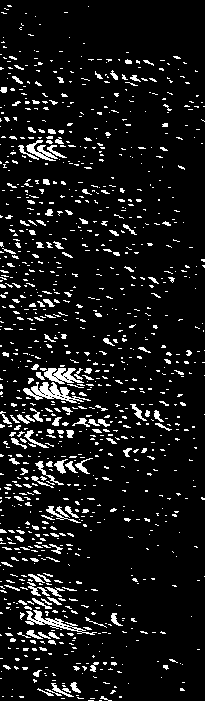

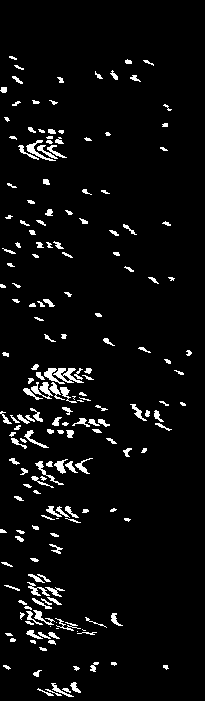

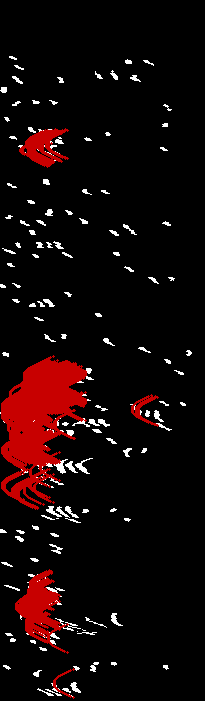

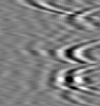

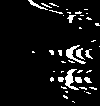

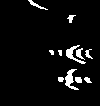

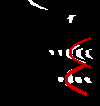

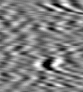

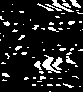

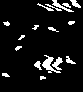

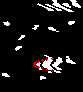

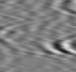

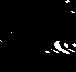

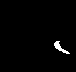

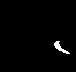

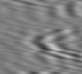

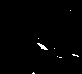

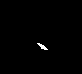

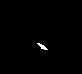

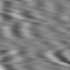

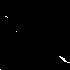

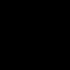

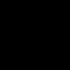

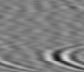

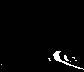

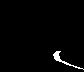

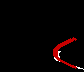

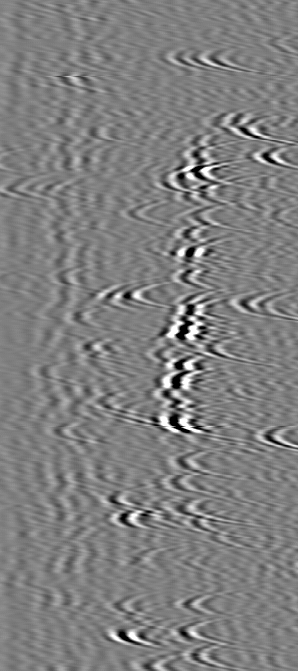

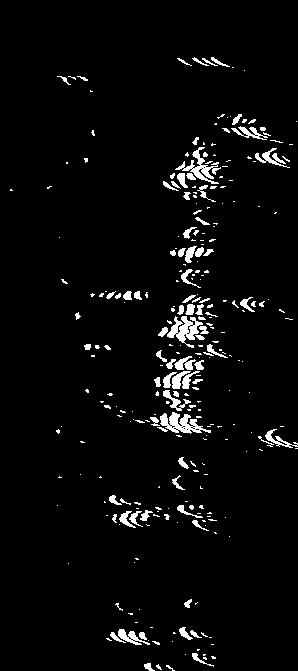

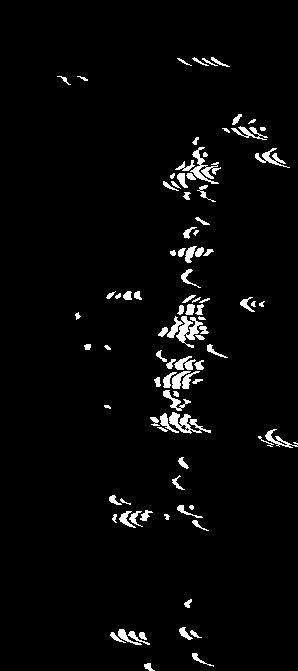

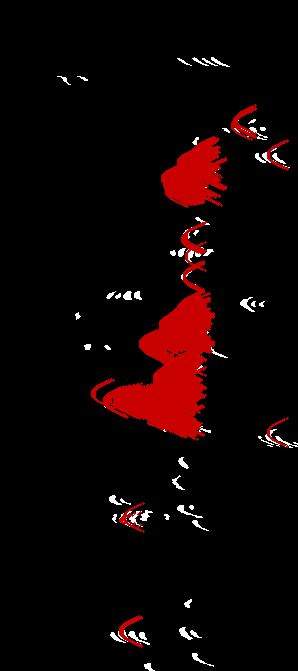

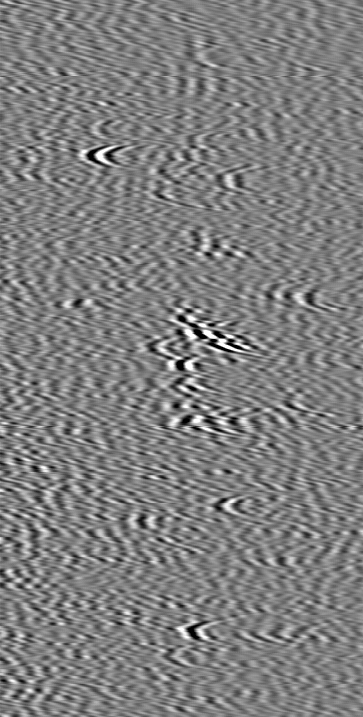

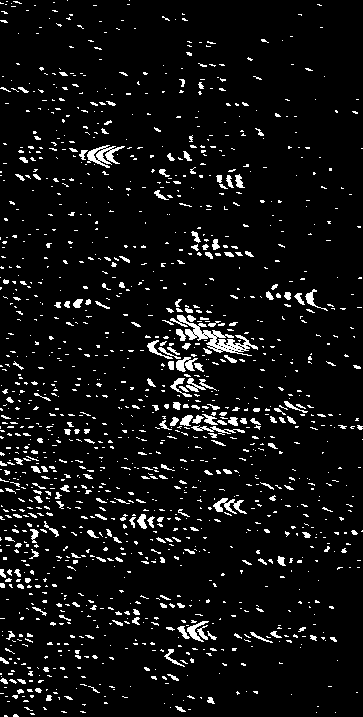

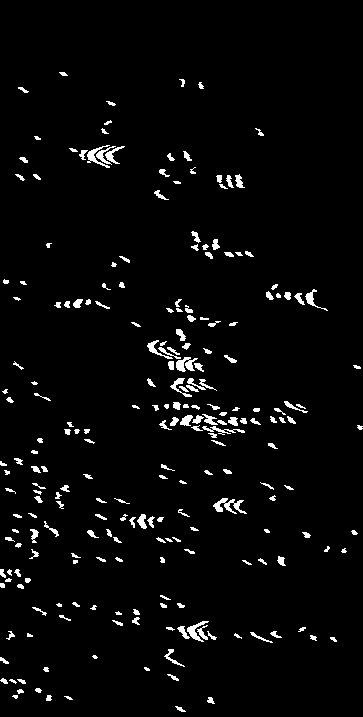

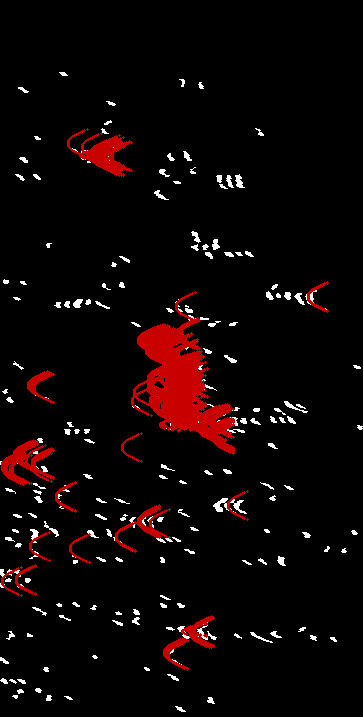

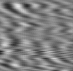

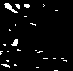

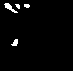

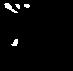

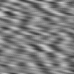

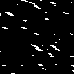

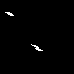

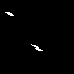

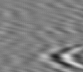

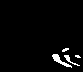

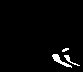

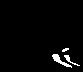

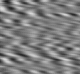

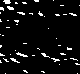

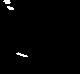

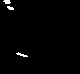

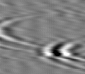

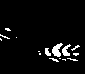

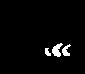

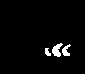

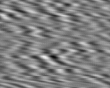

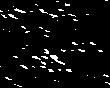

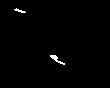

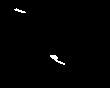

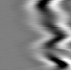

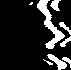

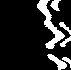

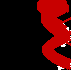

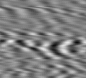

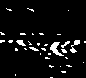

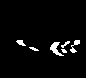

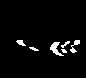

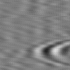

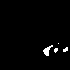

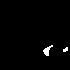

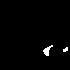

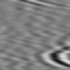

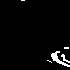

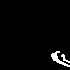

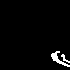

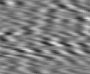

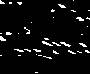

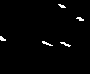

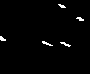

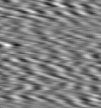

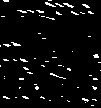

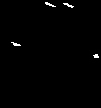

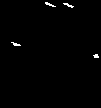

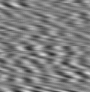

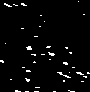

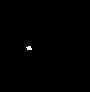

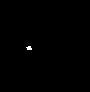

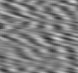

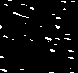

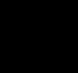

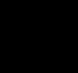

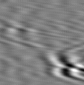

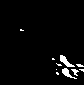

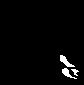

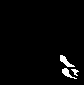

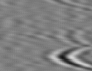

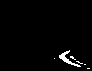

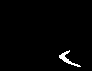

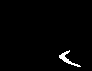

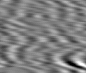

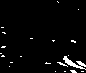

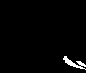

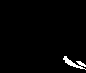

In [ ]:
for i in range(len(bbox)):
  im = im_arr[int(bbox['h_min'][i]) - 50:int(bbox['h_max'][i]) + 20, int(bbox['w_min'][i]) - 50:int(bbox['w_max'][i]) + 20].copy()
  cv2_imshow(im)
  im_thresh1 = cv2.inRange(im, 0, 80)
  im_thresh2 = cv2.inRange(im, 200, 255)
  im_thresh = cv2.bitwise_or(im_thresh1, im_thresh2)
  cv2_imshow(im_thresh)

  contours, hierarchy = cv2.findContours(im_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.ones(im_thresh.shape, dtype="uint8") * 255

  max_area = max(contours, key = cv2.contourArea)
  min_area = min(contours, key = cv2.contourArea)
  for contour in contours:
    if cv2.contourArea(contour) < 10 or cv2.contourArea(contour) > 500:
      cv2.drawContours(mask, [contour], -1, 0, -1)

  removed = cv2.bitwise_and(im_thresh, im_thresh, mask=mask)

  cv2_imshow(removed)

  acc_arr = hough(removed)

  reqd = []
  for h, w, a in np.argwhere(acc_arr > 18):
    reqd.append([h, w, a])
  
  im_col = cv2.cvtColor(removed,cv2.COLOR_GRAY2RGB)

  for h, w, a in reqd:
    draw_para(w,h,range_a[a], im_col, [0,0,200])

  cv2_imshow(im_col)

In [ ]:
reqd[0]

array([  6, 100,   0])

In [ ]:
cv2.imwrite('/drive/MyDrive/train_set/binary2.png', im1)

True